In [1]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import glob
import os
import sys
import random
sys.path.append('../')
from src.util import(
    KEYPOINT1_NAMES,
    KEYPOINT2_NAMES,
)

In [2]:
def draw_point(img, points, color, keypoint_names=None):
    for idx, point in enumerate(points.split(';')):
        p = (
            int(float(point.split(',')[0])),
            int(float(point.split(',')[1]))              
        )

        img = cv2.circle(
            img=img,
            center=p,
            radius=25,
            color=color,
            thickness=15,
            lineType=cv2.LINE_AA,    
        )
        
        if keypoint_names:
            cv2.putText(
                img=img,
#                 text=f'{idx}: {keypoint_names[idx]}', 
                text=f'{idx}', 
                org=tuple(p), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=3.0,
                color=(255, 255, 0),
                thickness=3
            )

    return img

In [3]:
BASE_PATH = random.choice(glob.glob('../data/*.*'))
IMAGE_PATH = os.path.join(BASE_PATH, 'images')
XML_FN = os.path.join(BASE_PATH, 'annotations.xml')

print(BASE_PATH)
assert os.path.isdir(BASE_PATH), 'wrong path'
assert os.path.isdir(IMAGE_PATH), 'wrong path'
assert os.path.isfile(XML_FN), 'wrong path'

../data\task_16_eos 9-3-2020_10_19_01_01_10-cvat for images 1.1


In [4]:
# https://www.xmlviewer.org/
# https://king-rabbit.github.io/python/xml-parsing/
tree = ET.parse(XML_FN)
root = tree.getroot()

In [5]:
for child in root[:5]:
    print(child.tag, child.attrib)

version {}
meta {}
image {'id': '50', 'name': '030282150001.png', 'width': '1988', 'height': '8975'}
image {'id': '49', 'name': '030267850001.png', 'width': '1896', 'height': '8300'}
image {'id': '48', 'name': '030264950001.png', 'width': '1898', 'height': '5234'}


In [6]:
image_node = random.choice(root[2:])
print(image_node.tag)
print(image_node.attrib)

image
{'id': '21', 'name': '030196160001.png', 'width': '1896', 'height': '7860'}


In [7]:
image_fn = os.path.join(IMAGE_PATH, image_node.attrib['name'])
print(image_fn)
assert os.path.isfile(image_fn)

../data\task_16_eos 9-3-2020_10_19_01_01_10-cvat for images 1.1\images\030196160001.png


In [8]:
key_points1 = None
key_points2 = None

for sub_node in image_node:
    if sub_node.attrib['label'] == 'point1':
        key_points1 = sub_node.attrib['points'] ## less than 15 pairs
    elif sub_node.attrib['label'] == 'point2':
        key_points2 = sub_node.attrib['points'] ## less than  3 pairs
    else:
        raise NameError()
        
print(len(key_points1.split(';'))) 
print(len(key_points2.split(';')))

In [9]:
img = cv2.imread(image_fn)

KEYPOINTS1_COLOR = (0, 255, 0)
KEYPOINTS2_COLOR = (255, 0, 0)

img = draw_point(img, key_points1, KEYPOINTS1_COLOR, KEYPOINT1_NAMES)
img = draw_point(img, key_points2, KEYPOINTS2_COLOR, KEYPOINT2_NAMES)

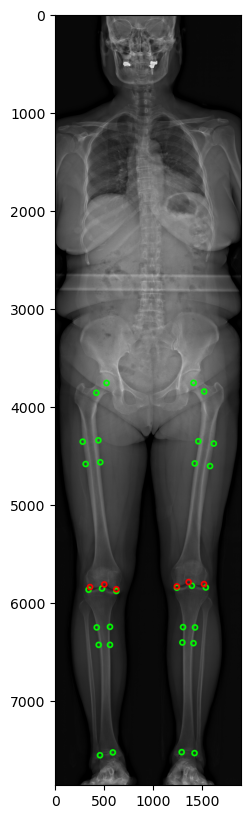

In [11]:
plt.figure(figsize=(30, 20))
plt.imshow(img)
plt.show()